In [1]:
using Revise
using LowRankVortex
using TransportBasedInference
using LinearAlgebra
using Statistics
using PotentialFlow
import PotentialFlow.Plates: Plate, Points, Blobs
import PotentialFlow.Motions: reset_velocity!
import PotentialFlow.Elements
import PotentialFlow.Properties: @property
using JLD
using ProgressMeter
using Interpolations
using Distributions
using Test

┌ Info: Precompiling LowRankVortex [fdf095b8-6f21-420b-9d49-8e692abb03d1]
└ @ Base loading.jl:1342
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broke

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

In [10]:
using Plots
default(tickfont = font("CMU Serif", 18), 
        titlefont = font("CMU Serif", 18), 
        guidefont = font("CMU Serif", 18),
#         legendfont = font("CMU Serif", 18),
        annotationfontsize = 18,
        annotationfontfamily = "CMU Serif",
        grid = false)
# clibrary(:colorbrewer)
pyplot()

using LaTeXStrings
PyPlot.rc("text", usetex = "true")
PyPlot.rc("font", family = "CMU Serif")
# gr()
using ColorSchemes

In [11]:
c_enkf = colorant"cornflowerblue"
c_lowrank_85 = colorant"gold"
c_lowrank_95 = colorant"tomato2"
c_lowrank_99 = colorant"seagreen3"

In [12]:
# for c in [c_enkf; c_lowrank_85; c_lowrank_95; c_lowrank_99]
#    @show c.r, c.g, c.b 
# end

In [13]:
Nv = 49
Nx = 3*Nv;

Ny = length(-1.5:0.5:10.0)

24

In [14]:
Ne = 30


rxhist_85 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
         "lowrank_Ne_"*string(Ne)*"_ratio_85.jld")["rxhist"]

ryhist_85 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
         "lowrank_Ne_"*string(Ne)*"_ratio_85.jld")["ryhist"];

rxhist_95 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
         "lowrank_Ne_"*string(Ne)*"_ratio_95.jld")["rxhist"]

ryhist_95 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
         "lowrank_Ne_"*string(Ne)*"_ratio_95.jld")["ryhist"];

rxhist_99 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
         "lowrank_Ne_"*string(Ne)*"_ratio_99.jld")["rxhist"]

ryhist_99 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
         "lowrank_Ne_"*string(Ne)*"_ratio_99.jld")["ryhist"];

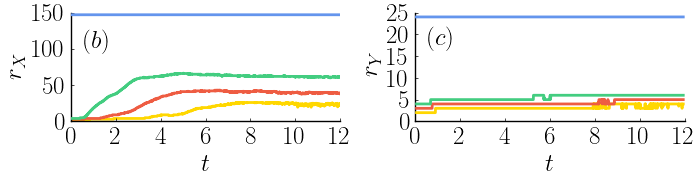

In [15]:
plt = plot(layout = grid(1, 2), xlims = (-Inf, Inf), xlabel = L"t", size = (700, 180))

plot!(plt[1,1], ylims = (0, 150), ylabel = L"r_{X}")
plot!(plt[1,1], (0.0:5e-3:12.0)[2:end], median(rxhist_85; dims = 1)[1,:], linewidth = 2, legend = false, 
     color = c_lowrank_85)
plot!(plt[1,1], (0.0:5e-3:12.0)[2:end], median(rxhist_95; dims = 1)[1,:], linewidth = 2, legend = false, 
     color = c_lowrank_95)
plot!(plt[1,1], (0.0:5e-3:12.0)[2:end], median(rxhist_99; dims = 1)[1,:], linewidth = 2, legend = false, 
      color = c_lowrank_99)
plot!(plt[1,1], 0.0:5e-3:12.0, [Nx], linewidth = 2, legend = false, color = c_enkf)
annotate!(plt[1,1], 1.2, 110, L"(b)")


plot!(plt[1,2], ylims = (0, 25), ylabel = L"r_{Y}")
plot!(plt[1,2], (0.0:5e-3:12.0)[2:end], median(ryhist_85; dims = 1)[1,:], linewidth = 2, legend = false, 
      color = c_lowrank_85)
plot!(plt[1,2], (0.0:5e-3:12.0)[2:end], median(ryhist_95; dims = 1)[1,:], linewidth = 2, legend = false, 
      color = c_lowrank_95)
plot!(plt[1,2], (0.0:5e-3:12.0)[2:end], median(ryhist_99; dims = 1)[1,:], linewidth = 2, legend = false,
      color = c_lowrank_99)
plot!(plt[1,2], 0.0:5e-3:12.0, [Ny], linewidth = 2, legend = false, color = c_enkf)
annotate!(plt[1,2], 1.2, 19, L"(c)")
# savefig("vortex_patch_rank_Ne_"*string(Ne)*".pdf")

In [16]:
Nelist = [10; 12; 15;20; 25; 30; 40; 50; 60; 80; 100]

q5_rmse_lowrank_85 = zeros(length(Nelist))
q25_rmse_lowrank_85 = zeros(length(Nelist))
q50_rmse_lowrank_85 = zeros(length(Nelist))
q75_rmse_lowrank_85 = zeros(length(Nelist))
q95_rmse_lowrank_85 = zeros(length(Nelist))

q5_rmse_lowrank_95 = zeros(length(Nelist))
q25_rmse_lowrank_95 = zeros(length(Nelist))
q50_rmse_lowrank_95 = zeros(length(Nelist))
q75_rmse_lowrank_95 = zeros(length(Nelist))
q95_rmse_lowrank_95 = zeros(length(Nelist))

q5_rmse_lowrank_99 = zeros(length(Nelist))
q25_rmse_lowrank_99 = zeros(length(Nelist))
q50_rmse_lowrank_99 = zeros(length(Nelist))
q75_rmse_lowrank_99 = zeros(length(Nelist))
q95_rmse_lowrank_99 = zeros(length(Nelist))


q5_rmse_enkf = zeros(length(Nelist))
q25_rmse_enkf = zeros(length(Nelist))
q50_rmse_enkf = zeros(length(Nelist))
q75_rmse_enkf = zeros(length(Nelist))
q95_rmse_enkf = zeros(length(Nelist))

for (i, Nei) in enumerate(Nelist)
    @show Nei

    rmse_lowrank_85 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
             "lowrank_Ne_"*string(Nei)*"_ratio_85.jld")["rmse"]
    
    q5_rmse_lowrank_85[i] = quantile(rmse_lowrank_85, 0.05)
    q25_rmse_lowrank_85[i] = quantile(rmse_lowrank_85, 0.25)
    q50_rmse_lowrank_85[i] = quantile(rmse_lowrank_85, 0.50)
    q75_rmse_lowrank_85[i] = quantile(rmse_lowrank_85, 0.75)
    q95_rmse_lowrank_85[i] = quantile(rmse_lowrank_85, 0.95)
    
    rmse_lowrank_95 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
             "lowrank_Ne_"*string(Nei)*"_ratio_95.jld")["rmse"]
    
    q5_rmse_lowrank_95[i] = quantile(rmse_lowrank_95, 0.05)
    q25_rmse_lowrank_95[i] = quantile(rmse_lowrank_95, 0.25)
    q50_rmse_lowrank_95[i] = quantile(rmse_lowrank_95, 0.50)
    q75_rmse_lowrank_95[i] = quantile(rmse_lowrank_95, 0.75)
    q95_rmse_lowrank_95[i] = quantile(rmse_lowrank_95, 0.95)
    
    rmse_lowrank_99 = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
             "lowrank_Ne_"*string(Nei)*"_ratio_99.jld")["rmse"]
    
    q5_rmse_lowrank_99[i] = quantile(rmse_lowrank_99, 0.05)
    q25_rmse_lowrank_99[i] = quantile(rmse_lowrank_99, 0.25)
    q50_rmse_lowrank_99[i] = quantile(rmse_lowrank_99, 0.50)
    q75_rmse_lowrank_99[i] = quantile(rmse_lowrank_99, 0.75)
    q95_rmse_lowrank_99[i] = quantile(rmse_lowrank_99, 0.95)
    
    if (Nei >= 25) == true
        rmse_enkf = load("/media/mat/HDD/VortexPatch.jl/notebooks/datalocal/metric_vortexpatch_"*
                         "enkf_Ne_"*string(Nei)*"_3.jld")["rmse"]
        
#     rmse_enkf *= 1/length(1601:2401)^2
            q5_rmse_enkf[i] = quantile(rmse_enkf, 0.05)
            q25_rmse_enkf[i] = quantile(rmse_enkf, 0.25)
            q50_rmse_enkf[i] = quantile(rmse_enkf, 0.50)
            q75_rmse_enkf[i] = quantile(rmse_enkf, 0.75)
            q95_rmse_enkf[i] = quantile(rmse_enkf, 0.95)
    end
    
end

Nei = 10
Nei = 12
Nei = 15
Nei = 20
Nei = 25
Nei = 30
Nei = 40
Nei = 50
Nei = 60
Nei = 80
Nei = 100


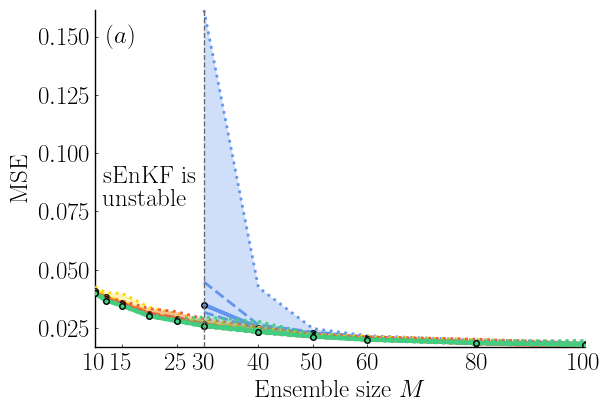

In [9]:
ratiolist = [85; 95; 99]

Neb = 6


Neplot = [10; 15; 25; 30 ; 40; 50; 60; 80; 100]


plt = plot(xlabel = "Ensemble size "*L"M", ylabel = "MSE", ylims = (-Inf, Inf),
           xlims = (-Inf, Inf), xticks = (Neplot, string.(Neplot)), legend = false)#, size = (600, 300))

# plot!(plt, Nelist[Neb:end], q5_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dot, color = c_enkf, 
#       label = "")
plot!(plt, Nelist[Neb:end], q25_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dash, color = c_enkf,
      label = "")
plot!(plt, Nelist[Neb:end], q50_rmse_enkf[Neb:end], linewidth = 3, linestyle = :solid, color = c_enkf,
      label = "Adaptive low-rank EnKF")
plot!(plt, Nelist[Neb:end], [q50_rmse_enkf[Neb:end] q50_rmse_enkf[Neb:end]], linewidth = 0.0,
      fillrange = [q5_rmse_enkf[Neb:end] q95_rmse_enkf[Neb:end]], alpha = 0.3, color = c_enkf,
      label = "")
plot!(plt, Nelist[Neb:end], q75_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dash, color = c_enkf,
      label = "")

plot!(plt, Nelist[Neb:end], q95_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dot, color = c_enkf,     
      label = "")

scatter!(plt, Nelist[Neb:end], q50_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dot, color = c_enkf,     
      label = "")


for ratio in ratiolist
    
    c_ratio = eval(Symbol("c_lowrank_"*string(ratio)))
    
    q5 = eval(Symbol("q5_rmse_lowrank_"*string(ratio)))
    q25 = eval(Symbol("q25_rmse_lowrank_"*string(ratio)))
    q50 = eval(Symbol("q50_rmse_lowrank_"*string(ratio)))
    q75 = eval(Symbol("q75_rmse_lowrank_"*string(ratio)))
    q95 = eval(Symbol("q95_rmse_lowrank_"*string(ratio)))
    
    plot!(plt, Nelist, q5, linewidth = 2, linestyle = :dot, 
          color = c_ratio, label = "")
    plot!(plt, Nelist, q25, linewidth = 2, linestyle = :dash, color = c_ratio,
          label = "")
    plot!(plt, Nelist, q50, linewidth = 3, linestyle = :solid, color = c_ratio, 
          label = "")
    plot!(plt, Nelist, [q50  q50], linewidth = 0.0,
          fillrange = [q5  q95], alpha = 0.3, color = c_ratio,
          label = "")  
    plot!(plt, Nelist, q75, linewidth = 2, linestyle = :dash, color = c_ratio,
          label = "")
    plot!(plt, Nelist, q95, linewidth = 2, linestyle = :dot, color = c_ratio,
          label = "")
    scatter!(plt, Nelist, q50, linewidth = 3, linestyle = :solid, color = c_ratio, 
          label = "")
end

vline!(plt, [30], color = :gray42, linestyle = :dash)
annotate!(plt, 20, 0.09, "sEnKF is ")
annotate!(plt, 19, 0.08, "unstable")
annotate!(plt, 15, 0.15,  L"(a)")

plt

savefig("vortexpatch_MSE_enkf_lowrank.pdf")

In [32]:
map(i->"")

8-element Vector{String}:
 "0.02"
 "0.03"
 "0.04"
 "0.05"
 "0.06"
 "0.07"
 "0.1"
 "0.15"

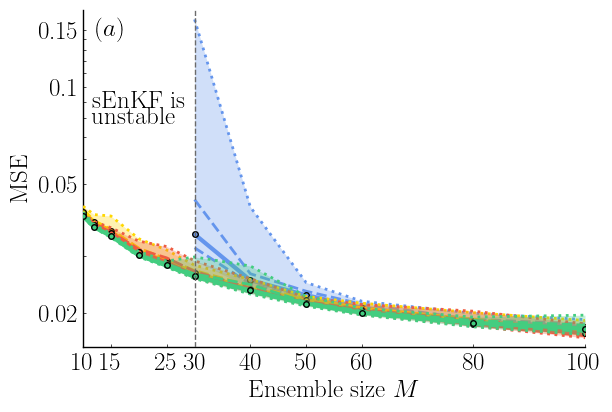

In [39]:
ratiolist = [85; 95; 99]

Neb = 6

Neplot = [10; 15; 25; 30 ; 40; 50; 60; 80; 100]

MSEplot = [0.02; 0.03; 0.04; 0.05; 0.06; 0.07; 0.08; 0.09; 0.10; 0.11; 0.12; 0.13; 0.14; 0.15]

plt = plot(xlabel = "Ensemble size "*L"M", ylabel = "MSE",
           xlims = (-Inf, Inf), xticks = (Neplot, string.(Neplot)), 
           yticks = (MSEplot, map(i-> ifelse(i ∈[0.02; 0.05; 0.1; 0.15], string(i), ""), MSEplot)),
           legend = false, yscale = :log10)#, size = (600, 300))

# plot!(plt, Nelist[Neb:end], q5_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dot, color = c_enkf, 
#       label = "")
plot!(plt, Nelist[Neb:end], q25_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dash, color = c_enkf,
      label = "")
plot!(plt, Nelist[Neb:end], q50_rmse_enkf[Neb:end], linewidth = 3, linestyle = :solid, color = c_enkf,
      label = "Adaptive low-rank EnKF")
plot!(plt, Nelist[Neb:end], [q50_rmse_enkf[Neb:end] q50_rmse_enkf[Neb:end]], linewidth = 0.0,
      fillrange = [q5_rmse_enkf[Neb:end] q95_rmse_enkf[Neb:end]], alpha = 0.3, color = c_enkf,
      label = "")
plot!(plt, Nelist[Neb:end], q75_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dash, color = c_enkf,
      label = "")

plot!(plt, Nelist[Neb:end], q95_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dot, color = c_enkf,     
      label = "")

scatter!(plt, Nelist[Neb:end], q50_rmse_enkf[Neb:end], linewidth = 2, linestyle = :dot, color = c_enkf,     
      label = "")


for ratio in ratiolist
    
    c_ratio = eval(Symbol("c_lowrank_"*string(ratio)))
    
    q5 = eval(Symbol("q5_rmse_lowrank_"*string(ratio)))
    q25 = eval(Symbol("q25_rmse_lowrank_"*string(ratio)))
    q50 = eval(Symbol("q50_rmse_lowrank_"*string(ratio)))
    q75 = eval(Symbol("q75_rmse_lowrank_"*string(ratio)))
    q95 = eval(Symbol("q95_rmse_lowrank_"*string(ratio)))
    
    plot!(plt, Nelist, q5, linewidth = 2, linestyle = :dot, 
          color = c_ratio, label = "")
    plot!(plt, Nelist, q25, linewidth = 2, linestyle = :dash, color = c_ratio,
          label = "")
    plot!(plt, Nelist, q50, linewidth = 3, linestyle = :solid, color = c_ratio, 
          label = "")
    plot!(plt, Nelist, [q50  q50], linewidth = 0.0,
          fillrange = [q5  q95], alpha = 0.3, color = c_ratio,
          label = "")  
    plot!(plt, Nelist, q75, linewidth = 2, linestyle = :dash, color = c_ratio,
          label = "")
    plot!(plt, Nelist, q95, linewidth = 2, linestyle = :dot, color = c_ratio,
          label = "")
    scatter!(plt, Nelist, q50, linewidth = 3, linestyle = :solid, color = c_ratio, 
          label = "")
end

vline!(plt, [30], color = :gray42, linestyle = :dash)
annotate!(plt, 20, 0.09, "sEnKF is ")
annotate!(plt, 19, 0.08, "unstable")
annotate!(plt, 15, 0.15,  L"(a)")

plt

savefig("vortexpatch_log_MSE_enkf_lowrank.pdf")